In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score as ras

%matplotlib inline

In [2]:
df = pd.read_csv('covidtrain.csv')

In [3]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
df.shape

(1628, 29)

In [5]:
df.describe()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,...,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,...,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,...,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,...,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,...,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


In [6]:
df.columns

Index(['Id', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

In [7]:
df.BusinessTravel.unique()

array(['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], dtype=object)

In [8]:
df.BusinessTravel.value_counts()

Travel_Rarely        1105
Travel_Frequently     403
Non-Travel            120
Name: BusinessTravel, dtype: int64

In [9]:
df.BusinessTravel.replace('Non-Travel', '0', inplace = True)
df.BusinessTravel.replace('Travel_Rarely', '1', inplace = True)
df.BusinessTravel.replace('Travel_Frequently', '2', inplace = True)
df.BusinessTravel.astype('int64')

0       0
1       1
2       1
3       1
4       1
       ..
1623    2
1624    1
1625    1
1626    1
1627    1
Name: BusinessTravel, Length: 1628, dtype: int64

In [10]:
df[['Attrition', 'BusinessTravel']].groupby('BusinessTravel').mean()

,Attrition
BusinessTravel,
0,0.291667
1,0.447964
2,0.632754


In [11]:
df.Age.describe()

count    1628.000000
mean       35.645577
std         9.481794
min        18.000000
25%        29.000000
50%        34.000000
75%        42.000000
max        60.000000
Name: Age, dtype: float64

In [12]:
age0 = df.loc[df.Attrition == 0, :]
a0 = age0.Age
age1 = df.loc[df.Attrition == 1, :]
a1 = age1.Age


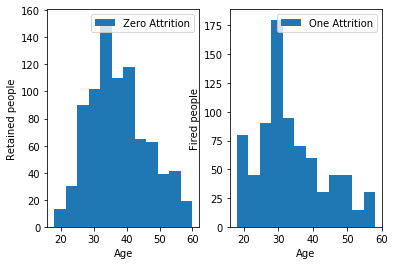

In [13]:
plt.subplot(121)
plt.hist(a0, label = 'Zero Attrition', bins = 12)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Retained people')

plt.subplot(122)
plt.hist(a1, label = 'One Attrition', bins = 12)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Fired people')

plt.show()

In [14]:
df.Age.replace(np.arange(18,26), 0, inplace = True)
df.Age.replace(np.arange(26,40), 1, inplace = True)
df.Age.replace(np.arange(40,61), 2, inplace = True)



In [15]:
df[['Attrition','Age']].groupby('Age').mean()

,Attrition
Age,
0,0.720930
1,0.478065
2,0.391221


In [16]:
df.Department.value_counts()

Research & Development    979
Sales                     568
Human Resources            81
Name: Department, dtype: int64

In [17]:
df.Department.replace(['Sales', 'Human Resources'], '0', inplace = True)
df.Department.replace(['Research & Development'], '1', inplace = True)
df.Department.astype('int64')


0       1
1       1
2       0
3       1
4       1
       ..
1623    1
1624    0
1625    0
1626    0
1627    1
Name: Department, Length: 1628, dtype: int64

In [18]:
df[['Attrition','Department']].groupby('Department').mean()

,Attrition
Department,
0,0.570108
1,0.423902


In [19]:
df.DistanceFromHome.describe()

count    1628.000000
mean        9.735258
std         8.306546
min         1.000000
25%         2.000000
50%         8.000000
75%        15.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [20]:
dfh0 = df.loc[df.Attrition == 0, :]
dfh0 = dfh0.DistanceFromHome
dfh1 = df.loc[df.Attrition == 1, :]
dfh1 = dfh1.DistanceFromHome

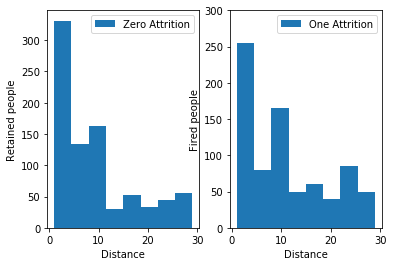

In [21]:
plt.subplot(121)
plt.hist(dfh0, label = 'Zero Attrition', bins = 8)
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Retained people')

plt.subplot(122)
plt.hist(dfh1, label = 'One Attrition', bins = 8)
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Fired people')
plt.yticks([0,50,100,150,200,250,300])

plt.show()

In [22]:
df.DistanceFromHome.replace(np.arange(0,10), 0, inplace = True)
df.DistanceFromHome.replace(np.arange(10,30), 1, inplace = True)


In [23]:
df[['Attrition','DistanceFromHome']].groupby('DistanceFromHome').mean()

,Attrition
DistanceFromHome,
0,0.442786
1,0.545746


In [24]:
df.Education.value_counts()

3    644
4    434
2    306
1    201
5     43
Name: Education, dtype: int64

In [25]:
df[['Attrition','Education']].groupby('Education').mean()

,Attrition
Education,
1,0.497512
2,0.506536
3,0.489130
4,0.460829
5,0.348837


In [26]:
df.Education.replace([1,2,3,4],0, inplace = True)
df.Education.replace(5,1, inplace = True)

In [27]:
df.EducationField.value_counts()

Life Sciences       623
Medical             521
Marketing           197
Technical Degree    162
Other                85
Human Resources      40
Name: EducationField, dtype: int64

In [28]:
df[['Attrition','EducationField']].groupby('EducationField').mean()

,Attrition
EducationField,
Human Resources,0.625000
Life Sciences,0.441413
Marketing,0.583756
Medical,0.451056
Other,0.411765
Technical Degree,0.617284


In [29]:
df.EducationField.replace(['Human Resources', 'Marketing', 'Technical Degree'], '1', inplace = True)
df.EducationField.replace(['Life Sciences', 'Medical', 'Other'], '0', inplace = True)
df.EducationField.astype('int64')

0       0
1       0
2       0
3       0
4       0
       ..
1623    0
1624    0
1625    0
1626    1
1627    0
Name: EducationField, Length: 1628, dtype: int64

In [30]:
df.EducationField.value_counts()

0    1229
1     399
Name: EducationField, dtype: int64

In [31]:
df[['Attrition', 'EducationField']].groupby('EducationField').mean()

,Attrition
EducationField,
0,0.443450
1,0.601504


In [32]:
df.EmployeeNumber.describe()

count    1628.000000
mean     1000.985872
std       585.417694
min         1.000000
25%       509.250000
50%       977.000000
75%      1494.000000
max      2068.000000
Name: EmployeeNumber, dtype: float64

In [33]:
en0 = df.loc[df.Attrition == 0, :]
en0 = en0.EmployeeNumber
en1 = df.loc[df.Attrition == 1, :]
en1 = en1.EmployeeNumber


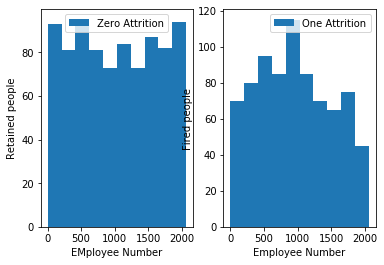

In [34]:
plt.subplot(121)
plt.hist(en0, label = 'Zero Attrition', bins = 10)
plt.legend()
plt.xlabel('EMployee Number')
plt.ylabel('Retained people')

plt.subplot(122)
plt.hist(en1, label = 'One Attrition', bins = 10)
plt.legend()
plt.xlabel('Employee Number')
plt.ylabel('Fired people')

plt.show()

In [35]:
df.EmployeeNumber.replace(np.arange(1,1495),0, inplace = True)
df.EmployeeNumber.replace(np.arange(1495,2069),1, inplace = True)

In [36]:
df.EmployeeNumber.value_counts()

0    1222
1     406
Name: EmployeeNumber, dtype: int64

In [37]:
df[['Attrition', 'EmployeeNumber']].groupby('EmployeeNumber').mean()

,Attrition
EmployeeNumber,
0,0.515548
1,0.381773


In [38]:
df.EnvironmentSatisfaction.value_counts()

3    480
4    472
1    372
2    304
Name: EnvironmentSatisfaction, dtype: int64

In [39]:
df[['Attrition', 'EnvironmentSatisfaction']].groupby('EnvironmentSatisfaction').mean()

,Attrition
EnvironmentSatisfaction,
1,0.604839
2,0.444079
3,0.458333
4,0.434322


In [40]:
df.EnvironmentSatisfaction.replace([2,3,4],0, inplace = True)

In [41]:
df.Gender.value_counts()

Male      996
Female    632
Name: Gender, dtype: int64

In [42]:
df.Gender.replace('Male', '1', inplace = True)
df.Gender.replace('Female', '0', inplace = True)
df.Gender.astype('int64')

0       0
1       0
2       1
3       1
4       1
       ..
1623    1
1624    1
1625    1
1626    1
1627    1
Name: Gender, Length: 1628, dtype: int64

In [43]:
df[['Attrition','Gender','Age']].groupby(['Gender','Age']).mean()

Attrition
Gender Age           
0      0     0.750000
       1     0.471429
       2     0.346535
1      0     0.703704
       1     0.482375
       2     0.419255

In [44]:
df.JobInvolvement.value_counts()

3    925
2    447
4    130
1    126
Name: JobInvolvement, dtype: int64

In [45]:
df[['Attrition','JobInvolvement']].groupby('JobInvolvement').mean()

,Attrition
JobInvolvement,
1,0.714286
2,0.525727
3,0.448649
4,0.346154


In [46]:
df.JobRole.value_counts()

Sales Executive              365
Research Scientist           341
Laboratory Technician        310
Sales Representative         172
Manufacturing Director       121
Healthcare Representative    110
Manager                       90
Human Resources               72
Research Director             47
Name: JobRole, dtype: int64

In [47]:
df[['Attrition','JobRole']].groupby('JobRole').mean().sort_values('Attrition')

,Attrition
JobRole,
Research Director,0.000000
Manager,0.222222
Healthcare Representative,0.227273
Manufacturing Director,0.247934
Research Scientist,0.483871
Sales Executive,0.506849
Laboratory Technician,0.580645
Human Resources,0.625000
Sales Representative,0.784884


In [48]:
df.JobRole.replace('Research Director', '0', inplace = True)
df.JobRole.replace(['Manager','Healthcare Representative', 'Manufacturing Director'], '1', inplace = True)
df.JobRole.replace(['Research Scientist','Sales Executive'], '2', inplace = True)
df.JobRole.replace('Laboratory Technician', '3', inplace = True)
df.JobRole.replace('Human Resources','4', inplace = True)
df.JobRole.replace('Sales Representative', '5', inplace = True)
df.JobRole.astype('int64')

0       3
1       1
2       2
3       2
4       1
       ..
1623    2
1624    2
1625    5
1626    4
1627    2
Name: JobRole, Length: 1628, dtype: int64

In [49]:
df.JobSatisfaction.value_counts()

3    529
4    434
1    356
2    309
Name: JobSatisfaction, dtype: int64

In [50]:
df[['Attrition','JobSatisfaction']].groupby('JobSatisfaction').mean().sort_values('Attrition')

,Attrition
JobSatisfaction,
4,0.368664
3,0.491493
2,0.501618
1,0.589888


In [51]:
df.JobSatisfaction.replace(3,2, inplace = True)
df.JobSatisfaction.replace(4,3, inplace = True)

In [52]:
df.MaritalStatus.value_counts()

Married     681
Single      630
Divorced    317
Name: MaritalStatus, dtype: int64

In [53]:
df[['Attrition','MaritalStatus']].groupby('MaritalStatus').mean().sort_values('Attrition')

,Attrition
MaritalStatus,
Married,0.389134
Divorced,0.394322
Single,0.626984


In [54]:
df.MaritalStatus.replace(['Married', 'Divorced'], '0', inplace = True)
df.MaritalStatus.replace('Single', '1', inplace = True)
df.MaritalStatus.astype('int64')

0       1
1       0
2       1
3       1
4       0
       ..
1623    0
1624    1
1625    0
1626    0
1627    1
Name: MaritalStatus, Length: 1628, dtype: int64

In [55]:
df.MonthlyIncome.describe()

count     1628.000000
mean      5785.524570
std       4339.293147
min       1009.000000
25%       2625.000000
50%       4304.000000
75%       7124.250000
max      19999.000000
Name: MonthlyIncome, dtype: float64

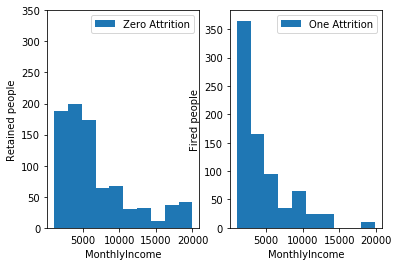

In [56]:
mi0 = df.loc[df.Attrition == 0, :]
mi0 = mi0.MonthlyIncome
mi1 = df.loc[df.Attrition == 1, :]
mi1 = mi1.MonthlyIncome

plt.subplot(121)
plt.hist(mi0, label = 'Zero Attrition', bins = 10)
plt.legend()
plt.xlabel('MonthlyIncome')
plt.ylabel('Retained people')
plt.yticks([0,50,100,150,200,250,300,350])


plt.subplot(122)
plt.hist(mi1, label = 'One Attrition', bins = 10)
plt.legend()
plt.xlabel('MonthlyIncome')
plt.ylabel('Fired people')

plt.show()

In [57]:
df.MonthlyIncome.replace(np.arange(0,2001), 0, inplace = True)
df.MonthlyIncome.replace(np.arange(2001,25000), 1, inplace = True)
df.MonthlyIncome.astype('int64')

0       1
1       1
2       1
3       1
4       1
       ..
1623    1
1624    1
1625    1
1626    1
1627    1
Name: MonthlyIncome, Length: 1628, dtype: int64

In [58]:
df[['Attrition','MonthlyIncome']].groupby('MonthlyIncome').mean().sort_values('Attrition')

,Attrition
MonthlyIncome,
1,0.471038
0,0.789474


In [59]:
df.NumCompaniesWorked.replace([1,2,3,4], 0, inplace = True)
df.NumCompaniesWorked.replace([5,6,7,8,9], 1, inplace = True)



In [60]:
df[['Attrition','NumCompaniesWorked']].groupby('NumCompaniesWorked').mean().sort_values('Attrition')

,Attrition
NumCompaniesWorked,
0,0.461416
1,0.552561


In [61]:
df.OverTime.value_counts()

No     1000
Yes     628
Name: OverTime, dtype: int64

In [62]:
df[['Attrition','OverTime']].groupby('OverTime').mean().sort_values('Attrition')

,Attrition
OverTime,
No,0.355000
Yes,0.684713


In [63]:
df.OverTime.replace(['No','Yes'],['0','1'], inplace = True)
df.OverTime.astype('int64')

0       0
1       1
2       0
3       0
4       0
       ..
1623    1
1624    0
1625    0
1626    1
1627    1
Name: OverTime, Length: 1628, dtype: int64

In [64]:
df.PercentSalaryHike.unique()

array([14, 12, 16, 13, 15, 11, 17, 19, 18, 22, 23, 20, 24, 25, 21],
      dtype=int64)

In [65]:
df[['Attrition','PercentSalaryHike']].groupby('PercentSalaryHike').mean().sort_values('Attrition')

,Attrition
PercentSalaryHike,
25,0.277778
19,0.367647
20,0.400000
14,0.402010
18,0.430108
13,0.433790
21,0.446429
23,0.468750
12,0.495495


In [66]:
df.PerformanceRating.value_counts()

3    1375
4     253
Name: PerformanceRating, dtype: int64

In [67]:
df[['Attrition','PerformanceRating']].groupby('PerformanceRating').mean().sort_values('Attrition')

,Attrition
PerformanceRating,
3,0.480000
4,0.494071


In [68]:
df.StockOptionLevel.value_counts()

0    836
1    557
2    135
3    100
Name: StockOptionLevel, dtype: int64

In [69]:
df[['Attrition','StockOptionLevel']].groupby('StockOptionLevel').mean().sort_values('Attrition')

,Attrition
StockOptionLevel,
1,0.323160
2,0.333333
3,0.500000
0,0.610048


In [70]:
df.StockOptionLevel.replace(2,1, inplace = True)

In [71]:
df.StockOptionLevel.replace(3,2, inplace = True)

In [72]:
df.TotalWorkingYears.describe()

count    1628.000000
mean        9.949017
std         7.482936
min         0.000000
25%         5.000000
50%         8.000000
75%        13.000000
max        38.000000
Name: TotalWorkingYears, dtype: float64

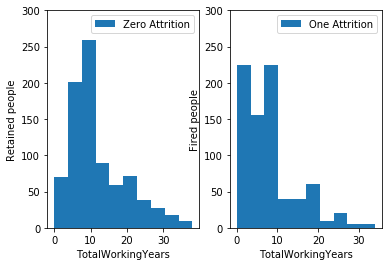

In [73]:
twy0 = df.loc[df.Attrition == 0, :]
twy0 = twy0.TotalWorkingYears
twy1 = df.loc[df.Attrition == 1, :]
twy1 = twy1.TotalWorkingYears

plt.subplot(121)
plt.hist(twy0, label = 'Zero Attrition', bins = 10)
plt.legend()
plt.yticks([0,50,100,150,200,250,300])

plt.xlabel('TotalWorkingYears')
plt.ylabel('Retained people')

plt.subplot(122)
plt.hist(twy1, label = 'One Attrition', bins = 10)
plt.legend()
plt.yticks([0,50,100,150,200,250,300])
plt.xlabel('TotalWorkingYears')
plt.ylabel('Fired people')

plt.show()

In [74]:
df.TotalWorkingYears.replace([0,1,2,3], 0 , inplace = True)
df.TotalWorkingYears.replace(np.arange(4,11), 1 , inplace = True)
df.TotalWorkingYears.replace(np.arange(11,18), 2 , inplace = True)
df.TotalWorkingYears.replace(np.arange(18,40), 3 , inplace = True)

In [75]:
df[['Attrition','TotalWorkingYears']].groupby('TotalWorkingYears').mean().sort_values('Attrition')

,Attrition
TotalWorkingYears,
3,0.319549
2,0.386179
1,0.462850
0,0.762712


In [76]:
df.TrainingTimesLastYear.value_counts()

2    610
3    534
4    139
5    133
1     78
0     74
6     60
Name: TrainingTimesLastYear, dtype: int64

In [77]:
df[['Attrition','TrainingTimesLastYear']].groupby('TrainingTimesLastYear').mean().sort_values('Attrition')

,Attrition
TrainingTimesLastYear,
6,0.250000
5,0.413534
3,0.440075
2,0.508197
1,0.512821
4,0.575540
0,0.675676


In [78]:
df.YearsAtCompany.value_counts()

1     283
5     183
2     176
3     139
4     119
10    117
7      88
8      82
9      79
6      79
0      73
13     24
11     21
20     21
15     18
14     18
21     14
17     13
18      9
19      9
22      9
33      9
24      8
16      8
12      7
23      6
26      4
31      2
36      2
27      2
29      1
30      1
32      1
25      1
34      1
37      1
Name: YearsAtCompany, dtype: int64

In [79]:
df.YearsAtCompany.replace(np.arange(20,41), '20+' , inplace = True)

In [80]:
df.YearsAtCompany.replace(np.arange(0,5),'0-5', inplace = True)

In [81]:
df.YearsAtCompany.replace(np.arange(5,10),'5-10', inplace = True)
df.YearsAtCompany.replace(np.arange(10,20),'10-20', inplace = True)

In [82]:
df.YearsAtCompany.value_counts()

0-5      790
5-10     511
10-20    244
20+       83
Name: YearsAtCompany, dtype: int64

In [83]:
df[['Attrition','YearsAtCompany']].groupby('YearsAtCompany').mean().sort_values('Attrition')

,Attrition
YearsAtCompany,
20+,0.240964
10-20,0.348361
5-10,0.381605
0-5,0.613924


In [84]:
df.YearsAtCompany.replace('0-5', '0', inplace = True)
df.YearsAtCompany.replace('5-10','1', inplace = True)
df.YearsAtCompany.replace('10-20','2', inplace = True)
df.YearsAtCompany.replace('20+','3', inplace = True)
df.YearsAtCompany.astype('int64')


0       2
1       0
2       1
3       1
4       2
       ..
1623    0
1624    1
1625    0
1626    0
1627    0
Name: YearsAtCompany, Length: 1628, dtype: int64

In [85]:
df.YearsInCurrentRole.value_counts()

2     437
0     361
7     219
3     143
4     109
1      84
8      76
9      57
10     26
6      25
5      25
13     17
11     16
12      9
14      9
15      5
16      5
17      3
18      2
Name: YearsInCurrentRole, dtype: int64

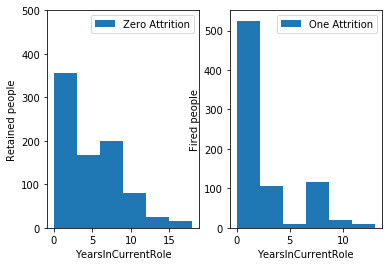

In [86]:
ycr0 = df.loc[df.Attrition == 0, :]
ycr0 = ycr0.YearsInCurrentRole
ycr1 = df.loc[df.Attrition == 1, :]
ycr1 = ycr1.YearsInCurrentRole

plt.subplot(121)
plt.hist(ycr0, label = 'Zero Attrition', bins = 6)
plt.legend()
plt.xlabel('YearsInCurrentRole')
plt.ylabel('Retained people')
plt.yticks([0,100,200,300,400,500])

plt.subplot(122)
plt.hist(ycr1, label = 'One Attrition', bins = 6)
plt.legend()
plt.xlabel('YearsInCurrentRole')
plt.ylabel('Fired people')

plt.show()

In [87]:
df.YearsInCurrentRole.replace([0,1,2],0, inplace = True)
df.YearsInCurrentRole.replace([3,4,5],1, inplace = True)
df.YearsInCurrentRole.replace([6,7,8,9],2, inplace = True)
df.YearsInCurrentRole.replace(np.arange(10,19),3, inplace = True)

In [88]:
df[['Attrition','YearsInCurrentRole']].groupby('YearsInCurrentRole').mean().sort_values('Attrition')

,Attrition
YearsInCurrentRole,
3,0.163043
2,0.358090
1,0.397112
0,0.595238


In [89]:
df.YearsWithCurrManager.value_counts()

0     414
2     368
7     221
3     148
8      98
4      95
1      94
9      47
5      29
10     27
6      25
11     15
12     13
14     13
13     10
15      5
17      5
16      1
Name: YearsWithCurrManager, dtype: int64

In [90]:
df[['Attrition','YearsWithCurrManager']].groupby('YearsWithCurrManager').mean().sort_values('Attrition')

,Attrition
YearsWithCurrManager,
17,0.000000
15,0.000000
13,0.000000
12,0.000000
16,0.000000
9,0.212766
11,0.333333
5,0.344828
8,0.357143


In [91]:
df.YearsWithCurrManager.replace(np.arange(2,12),1, inplace = True)
df.YearsWithCurrManager.replace(np.arange(12,18),2, inplace = True)


In [92]:
df.CommunicationSkill.value_counts()

5    375
4    342
2    325
3    313
1    273
Name: CommunicationSkill, dtype: int64

In [93]:
df[['Attrition','CommunicationSkill']].groupby('CommunicationSkill').mean().sort_values('Attrition')

,Attrition
CommunicationSkill,
1,0.366300
3,0.447284
4,0.497076
2,0.507692
5,0.560000


In [94]:
df.Behaviour.value_counts()

1    1628
Name: Behaviour, dtype: int64

In [95]:
df[['Attrition','Behaviour']].groupby('Behaviour').mean().sort_values('Attrition')

,Attrition
Behaviour,
1,0.482187


In [96]:
Y = df.Attrition

In [97]:
df.corr()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,1.000000,-0.151102,0.694838,0.066170,-0.025287,-0.085159,0.104697,-0.127778,-0.111779,-0.086704,...,-0.003705,0.022698,-0.150298,-0.188310,-0.080326,-0.176025,-0.039062,-0.194872,0.083742,NaN
Age,-0.151102,1.000000,-0.188247,0.001471,0.064221,0.065752,-0.008163,0.052921,0.013940,0.267869,...,0.008210,0.002570,0.133763,0.599986,-0.002590,0.291754,0.219823,0.206303,0.006783,NaN
Attrition,0.694838,-0.188247,1.000000,0.100149,-0.043956,-0.115831,0.133585,-0.159710,-0.154971,-0.117138,...,-0.012668,0.010202,-0.212262,-0.250249,-0.105663,-0.257405,-0.050379,-0.262769,0.103379,NaN
DistanceFromHome,0.066170,0.001471,0.100149,1.000000,0.012175,0.013532,-0.004082,0.045915,-0.072466,-0.008164,...,0.077034,0.052961,0.028341,-0.017117,0.005123,-0.009233,0.006198,-0.072249,-0.039997,NaN
Education,-0.025287,0.064221,-0.043956,0.012175,1.000000,0.064421,-0.044024,0.020965,-0.005844,0.031374,...,0.058277,0.013931,0.021645,0.041406,0.052488,0.009687,0.002304,0.005511,-0.024036,NaN
EmployeeNumber,-0.085159,0.065752,-0.115831,0.013532,0.064421,1.000000,-0.053329,0.015238,-0.007052,0.024832,...,-0.053271,-0.039558,0.157539,0.053260,0.041349,0.042086,0.014050,0.069287,-0.011204,NaN
EnvironmentSatisfaction,0.104697,-0.008163,0.133585,-0.004082,-0.044024,-0.053329,1.000000,-0.003941,-0.045940,0.063868,...,0.037617,0.061335,-0.035624,0.033402,-0.027170,-0.050232,-0.013654,0.039030,0.063887,NaN
JobInvolvement,-0.127778,0.052921,-0.159710,0.045915,0.020965,0.015238,-0.003941,1.000000,-0.014095,0.063911,...,-0.042988,-0.063512,0.064102,0.065003,-0.027122,0.027083,0.006373,0.112058,0.052877,NaN
JobSatisfaction,-0.111779,0.013940,-0.154971,-0.072466,-0.005844,-0.007052,-0.045940,-0.014095,1.000000,-0.044571,...,-0.053047,-0.063728,0.026517,-0.017855,-0.007339,0.058963,0.005118,0.010238,-0.078819,NaN
MonthlyIncome,-0.086704,0.267869,-0.117138,-0.008164,0.031374,0.024832,0.063868,0.063911,-0.044571,1.000000,...,0.011637,-0.038205,0.072634,0.260664,-0.018452,0.156034,0.113760,0.264486,-0.000622,NaN


In [98]:
df.drop(columns= ['PercentSalaryHike','Behaviour','NumCompaniesWorked','PerformanceRating','Gender','Education','Age','Attrition','Id'], inplace = True)

In [99]:
trainx,testx,trainy,testy = tts(df,Y)


In [100]:
reg = LogisticRegression(max_iter = 5000)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()
sgd = SGDClassifier()
para1 = { 'C' : [0.001,0.01,0.1,1,10]}
para2 = {'n_neighbors' :[1,2,3,4,5,6,7]}
para3 = {'criterion' :['entropy','gini']}
para4 = {'loss':['modified_huber', 'log'], 'epsilon':[0.001,0.01,0.1,1,10], 'alpha' :[0.0001,0.001,0.01,0.1,1,10]}
abc1 = GridSearchCV(reg,param_grid = para1)
abc2 = GridSearchCV(knc,param_grid = para2)
abc3 = GridSearchCV(rfc,param_grid = para3)
abc4 = GridSearchCV(sgd,param_grid = para4)


In [101]:
abc1.fit(trainx, trainy)
abc2.fit(trainx, trainy)
abc3.fit(trainx, trainy)
abc4.fit(trainx, trainy)

y1 = abc1.predict_proba(testx)
y2 = abc2.predict_proba(testx)
y3 = abc3.predict_proba(testx)
y4 = abc4.predict_proba(testx)

reg2 = abc1.best_estimator_
knc2 = abc2.best_estimator_
rfc2 = abc3.best_estimator_
sgd2 = abc4.best_estimator_

y11 = reg2.predict_proba(testx)
y22 = knc2.predict_proba(testx)
y33 = rfc2.predict_proba(testx)
y44 = sgd2.predict_proba(testx)



In [102]:
y11 = pd.DataFrame(y11, columns = ['Fired', 'Retained']).drop(columns = 'Fired')
y22 = pd.DataFrame(y22, columns = ['Fired', 'Retained']).drop(columns = 'Fired')
y33 = pd.DataFrame(y33, columns = ['Fired', 'Retained']).drop(columns = 'Fired')
y44 = pd.DataFrame(y44, columns = ['Fired', 'Retained']).drop(columns = 'Fired')

In [103]:
s1 = ras(testy,y11)
s1


0.8596821716659421

In [104]:
s2 = ras(testy,y22)
s2

0.941747572815534

In [105]:
s3 = ras(testy,y33)
s3

0.999613582572574

In [106]:
s4 = ras(testy,y44)
s4

0.8523643916340627

In [107]:
df2 = pd.read_csv('testcovid.csv')
id2 = df2.Id

df2.BusinessTravel.replace('Non-Travel', '0', inplace = True)
df2.BusinessTravel.replace('Travel_Rarely', '1', inplace = True)
df2.BusinessTravel.replace('Travel_Frequently', '2', inplace = True)
df2.BusinessTravel.astype('int64')

df2.Age.replace(np.arange(18,26), 0, inplace = True)
df2.Age.replace(np.arange(26,40), 1, inplace = True)
df2.Age.replace(np.arange(40,61), 2, inplace = True)

df2.Department.replace(['Sales', 'Human Resources'], '0', inplace = True)
df2.Department.replace(['Research & Development'], '1', inplace = True)
df2.Department.astype('int64')

df2.DistanceFromHome.replace(np.arange(0,10), 0, inplace = True)
df2.DistanceFromHome.replace(np.arange(10,30), 1, inplace = True)

df2.Education.replace([1,2,3,4],0, inplace = True)
df2.Education.replace(5,1, inplace = True)

df2.EducationField.replace(['Human Resources', 'Marketing', 'Technical Degree'], '1', inplace = True)
df2.EducationField.replace(['Life Sciences', 'Medical', 'Other'], '0', inplace = True)
df2.EducationField.astype('int64')

df2.EmployeeNumber.replace(np.arange(1,1495),0, inplace = True)
df2.EmployeeNumber.replace(np.arange(1495,2069),1, inplace = True)

df2.EnvironmentSatisfaction.replace([2,3,4],0, inplace = True)

df2.JobRole.replace('Research Director', '0', inplace = True)
df2.JobRole.replace(['Manager','Healthcare Representative', 'Manufacturing Director'], '1', inplace = True)
df2.JobRole.replace(['Research Scientist','Sales Executive'], '2', inplace = True)
df2.JobRole.replace('Laboratory Technician', '3', inplace = True)
df2.JobRole.replace('Human Resources','4', inplace = True)
df2.JobRole.replace('Sales Representative', '5', inplace = True)
df2.JobRole.astype('int64')

df2.MaritalStatus.replace(['Married', 'Divorced'], '0', inplace = True)
df2.MaritalStatus.replace('Single', '1', inplace = True)
df2.MaritalStatus.astype('int64')

df2.JobSatisfaction.replace(3,2, inplace = True)
df2.JobSatisfaction.replace(4,3, inplace = True)

df2.OverTime.replace(['No','Yes'],['0','1'], inplace = True)
df2.OverTime.astype('int64')


df2.StockOptionLevel.replace(2,1, inplace = True)
df2.StockOptionLevel.replace(3,2, inplace = True)

df2.YearsAtCompany.replace(np.arange(20,41), '20+' , inplace = True)
df2.YearsAtCompany.replace(np.arange(0,5),'0-5', inplace = True)
df2.YearsAtCompany.replace(np.arange(5,10),'5-10', inplace = True)
df2.YearsAtCompany.replace(np.arange(10,20),'10-20', inplace = True)
df2.YearsAtCompany.replace('0-5', '0', inplace = True)
df2.YearsAtCompany.replace('5-10','1', inplace = True)
df2.YearsAtCompany.replace('10-20','2', inplace = True)
df2.YearsAtCompany.replace('20+','3', inplace = True)
df2.YearsAtCompany.astype('int64')

df2.YearsInCurrentRole.replace([0,1,2],0, inplace = True)
df2.YearsInCurrentRole.replace([3,4,5],1, inplace = True)
df2.YearsInCurrentRole.replace([6,7,8,9],2, inplace = True)
df2.YearsInCurrentRole.replace(np.arange(10,19),3, inplace = True)

df2.YearsWithCurrManager.replace(np.arange(2,12),1, inplace = True)
df2.YearsWithCurrManager.replace(np.arange(12,18),2, inplace = True)

df2.MonthlyIncome.replace(np.arange(0,2001), 0, inplace = True)
df2.MonthlyIncome.replace(np.arange(2001,25000), 1, inplace = True)
df2.MonthlyIncome.astype('int64')

df2.TotalWorkingYears.replace([0,1,2,3], 0 , inplace = True)
df2.TotalWorkingYears.replace(np.arange(4,11), 1 , inplace = True)
df2.TotalWorkingYears.replace(np.arange(11,18), 2 , inplace = True)
df2.TotalWorkingYears.replace(np.arange(18,40), 3 , inplace = True)

df2.Gender.replace(['Female','Male'],['0','1'], inplace = True)
df2.Gender.astype('int64')



0      1
1      1
2      1
3      0
4      1
      ..
465    1
466    0
467    1
468    1
469    0
Name: Gender, Length: 470, dtype: int64

In [108]:
df2.drop(columns= ['PercentSalaryHike','Behaviour','NumCompaniesWorked','PerformanceRating','Gender','Education','Age','Id'], inplace = True)

In [109]:
reg2.fit(df,Y)
rfc2.fit(df,Y)
sgd2.fit(df,Y)

y11 = reg2.predict_proba(df2)
y22 = reg2.predict_proba(df2)
y33 = rfc2.predict_proba(df2)
y44 = sgd2.predict_proba(df2)

y11 = pd.DataFrame(y11, columns = ['Fired', 'Attrition']).drop(columns = 'Fired')
y22 = pd.DataFrame(y22, columns = ['Fired', 'Attrition']).drop(columns = 'Fired')
y33 = pd.DataFrame(y33, columns = ['Fired', 'Attrition']).drop(columns = 'Fired')
y44 = pd.DataFrame(y44, columns = ['Fired', 'Attrition']).drop(columns = 'Fired')

In [112]:
output = pd.concat([id2,y11], axis = 1)
output.to_csv(r'C:\Users\Pranav\Desktop\summer analytics\out36', index = False, header = True)